# Physchem calculation for preclinical and clinical set

In [1]:
import pandas as pd
from molbert.datasets.smiles import BertSmilesDataset
from molbert.utils.featurizer.molfeaturizer import SmilesIndexFeaturizer
from tqdm import tqdm


In [2]:
clinical_pre_clinical_data = pd.read_csv("/projects/home/mmasood1/arslan_data_repository/Mix_clinical_pre_clinical/02_05_2024/clinical_pre_clinical_with_blood_marker_filtered.csv")
SMILES = clinical_pre_clinical_data.SMILES.tolist()
config_dict = {
    "max_seq_length": 128,
    "train_file": "/projects/home/mmasood1/arslan_data_repository/Mix_clinical_pre_clinical/02_05_2024/clinical_pre_clinical_with_blood_marker_filtered.csv",
    "num_physchem_properties": 200,
    "permute": False,
    
}

In [3]:
featurizer = SmilesIndexFeaturizer.bert_smiles_index_featurizer(config_dict["max_seq_length"], permute = False)
#elements = featurizer.load_periodic_table()[0]
#featurizer = SmilesIndexFeaturizer.bert_smiles_index_featurizer(max_length=config_dict["max_seq_length"], 
#                                                                allowed_elements=tuple(elements),
#                                                                permute = False)
config_dict["vocab_size"] = featurizer.vocab_size
train_dataset = BertSmilesDataset(
            input_path= config_dict['train_file'],
            featurizer= featurizer,
            single_seq_len= config_dict["max_seq_length"],
            total_seq_len= config_dict["max_seq_length"],
            num_physchem= config_dict["num_physchem_properties"],
            permute= config_dict["permute"],
            inference_mode = False
        )
descriptors_names = train_dataset.physchem_featurizer.descriptors

In [4]:

physchem_df = pd.DataFrame()
for s in tqdm(SMILES):
    physchem = train_dataset.calculate_physchem_props(s)
    physchem = pd.DataFrame(physchem).T
    physchem.columns = descriptors_names
    physchem.insert(0, "SMILES", s)
    physchem_df = pd.concat([physchem_df, physchem], axis = 0)
physchem_df

100%|██████████| 1554/1554 [01:05<00:00, 23.71it/s]


,SMILES,BalabanJ,BertzCT,Chi0,Chi0n,Chi0v,Chi1,Chi1n,Chi1v,Chi2n,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,qed
0,CC1=CC=CC(NC2=CC(Cl)=NC(SCC(=O)O)=N2)=C1C,0.862535,0.219687,0.201077,0.160880,0.234555,0.163501,0.117542,0.212894,0.111302,...,5.849552e-24,7.451206e-13,7.105427e-15,0.168407,0.167338,0.000247,3.476727e-17,0.164657,2.839180e-16,0.386560
0,CC(=O)NC1=CC=C2C(=C1)CC1=CC=CC=C12,0.765417,0.151859,0.045108,0.061544,0.044599,0.059934,0.080162,0.052257,0.108350,...,5.849552e-24,7.451206e-13,7.105427e-15,0.168407,0.167338,0.000247,3.476727e-17,0.164657,2.839180e-16,0.658865
0,CC(=O)NC1=CC=C(O)C=C1,0.963808,0.010124,0.005655,0.005505,0.004247,0.005535,0.005289,0.002989,0.005672,...,5.849552e-24,7.451206e-13,7.105427e-15,0.168407,0.167338,0.000247,3.476727e-17,0.164657,2.839180e-16,0.533049
0,CC(=O)NC1=NN=C(S(N)(=O)=O)S1,0.977945,0.048406,0.017056,0.007223,0.017372,0.010170,0.004034,0.037789,0.004565,...,9.999989e-01,7.451206e-13,7.105427e-15,0.168407,0.167338,0.000247,3.476727e-17,0.164657,2.839180e-16,0.591126
0,CN(C)CCC=C1C2=CC=CC=C2COC2=CC=CC=C21,0.783221,0.157435,0.155535,0.249928,0.197406,0.189441,0.268870,0.196136,0.305430,...,5.849552e-24,7.451206e-13,7.105427e-15,0.168407,0.167338,0.000247,3.476727e-17,0.164657,2.839180e-16,0.919325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,COC1C(CO)OC(OCC2OC(OC3C(CO)OC(C)C(O)C3O)C(O)C(...,0.355551,0.567830,0.990722,0.983715,0.977761,0.987517,0.980761,0.972363,0.971285,...,5.849552e-24,7.451206e-13,7.105427e-15,0.168407,0.167338,0.000247,3.476727e-17,0.164657,2.839180e-16,0.006941
0,CC1=CC=C(N2N=CC=N2)C(C(=O)N2CCN(C3=NC4=CC(Cl)=...,0.147439,0.814394,0.706784,0.725311,0.742153,0.745204,0.733542,0.702022,0.733058,...,5.849552e-24,7.451206e-13,7.105427e-15,0.168407,0.167338,0.000247,3.476727e-17,0.164657,2.839180e-16,0.345566
0,COC1OC(COS(=O)(=O)[O-])C(OC2OC(C(=O)O)C(OC)C(O...,0.932346,0.729545,0.949237,0.816071,0.892152,0.881117,0.669309,0.921912,0.673162,...,5.849552e-24,7.451206e-13,7.105427e-15,0.168407,0.167338,0.000247,3.476727e-17,0.164657,2.839180e-16,0.006272
0,[CH2]CC=O,0.884882,0.001061,0.001193,0.001460,0.002119,0.001184,0.001419,0.001615,0.001274,...,5.849552e-24,7.451206e-13,7.105427e-15,0.168407,0.167338,0.000247,3.476727e-17,0.164657,2.839180e-16,0.257083


In [42]:
df = physchem_df.drop("SMILES", axis = 1)
df = df.loc[:,df.var() > 1e-6]
selected_col = ["SMILES"] + df.columns.tolist()
df = physchem_df[selected_col]
df.to_csv("/projects/home/mmasood1/arslan_data_repository/Mix_clinical_pre_clinical/02_05_2024/PhysChem_clinical_pre_clinical_with_blood_marker_filtered.csv", index = False)

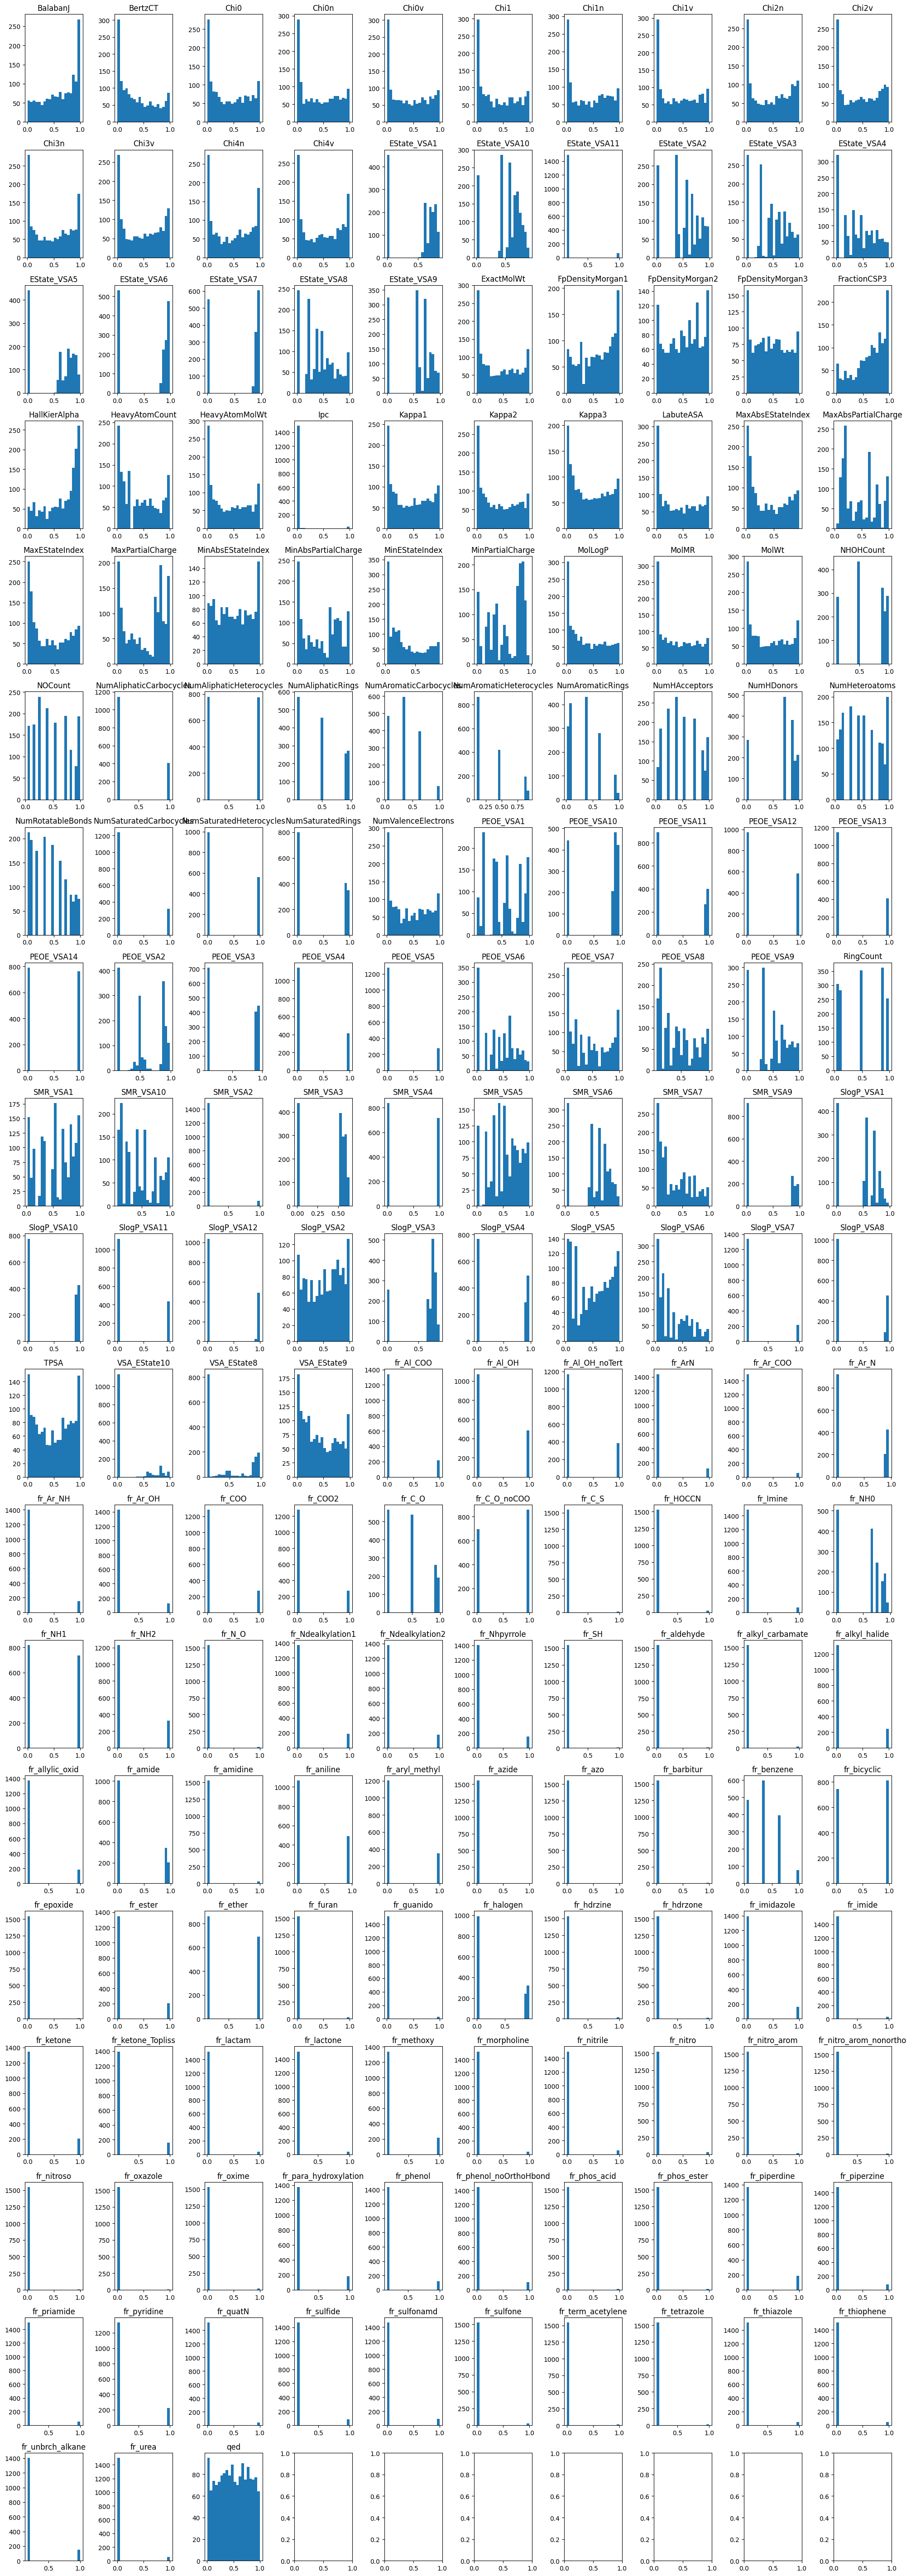

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

df = physchem_df.drop("SMILES", axis = 1)
df = df.loc[:,df.var() > 1e-6]

# Assuming df is your DataFrame
n_cols = 10  # Number of columns per row
n_rows = (df.shape[1] + n_cols - 1) // n_cols  # Calculate number of rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 3))

for i, col in enumerate(df.columns):
    ax = axes[i // n_cols, i % n_cols]
    ax.hist(df[col].dropna(), bins=20)
    ax.set_title(col)

plt.tight_layout()
plt.show()


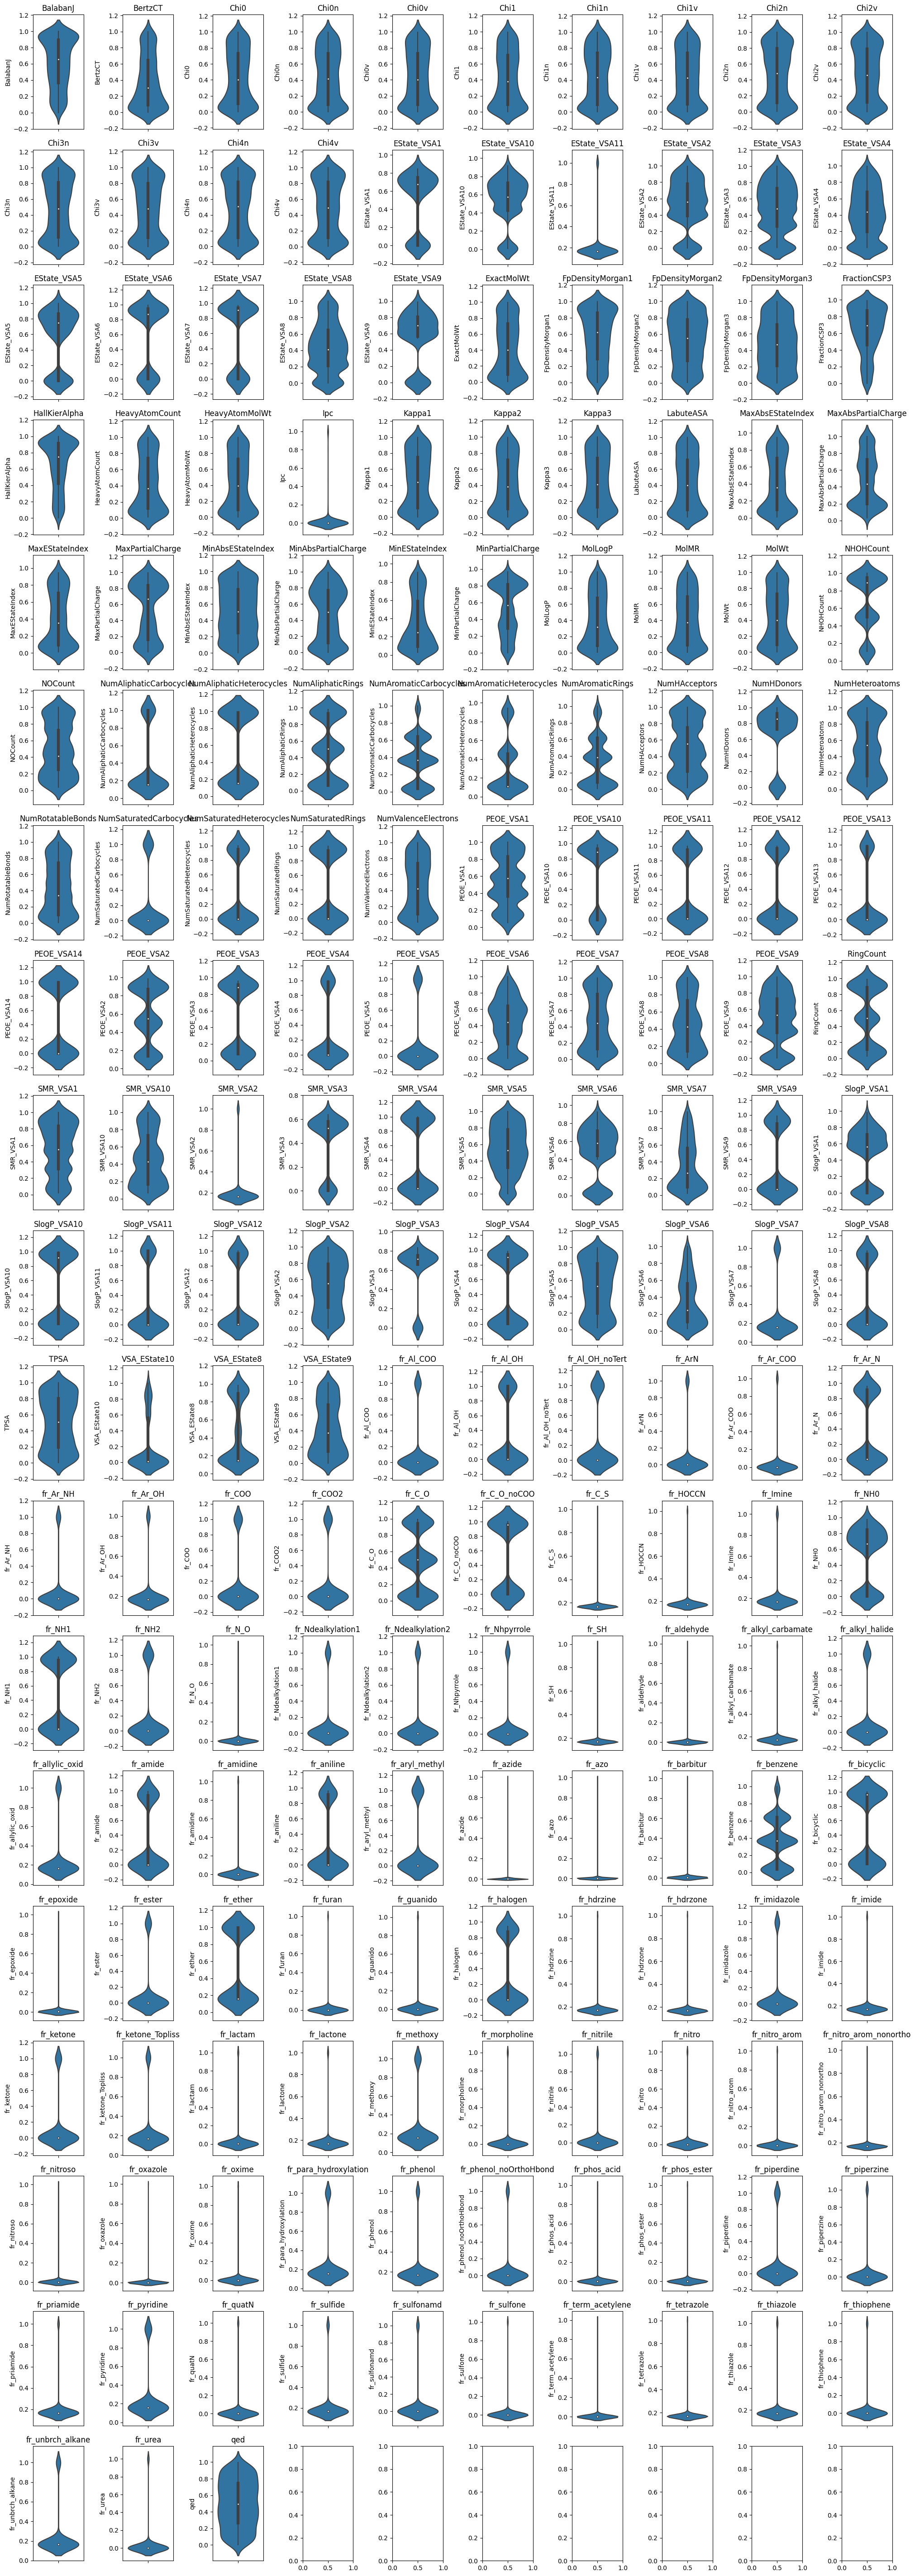

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
n_cols = 10  # Number of columns per row
n_rows = (df.shape[1] + n_cols - 1) // n_cols  # Calculate number of rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 3))

for i, col in enumerate(df.columns):
    ax = axes[i // n_cols, i % n_cols]
    sns.violinplot(y=df[col].dropna(), ax=ax)
    ax.set_title(col)

plt.tight_layout()
plt.show()

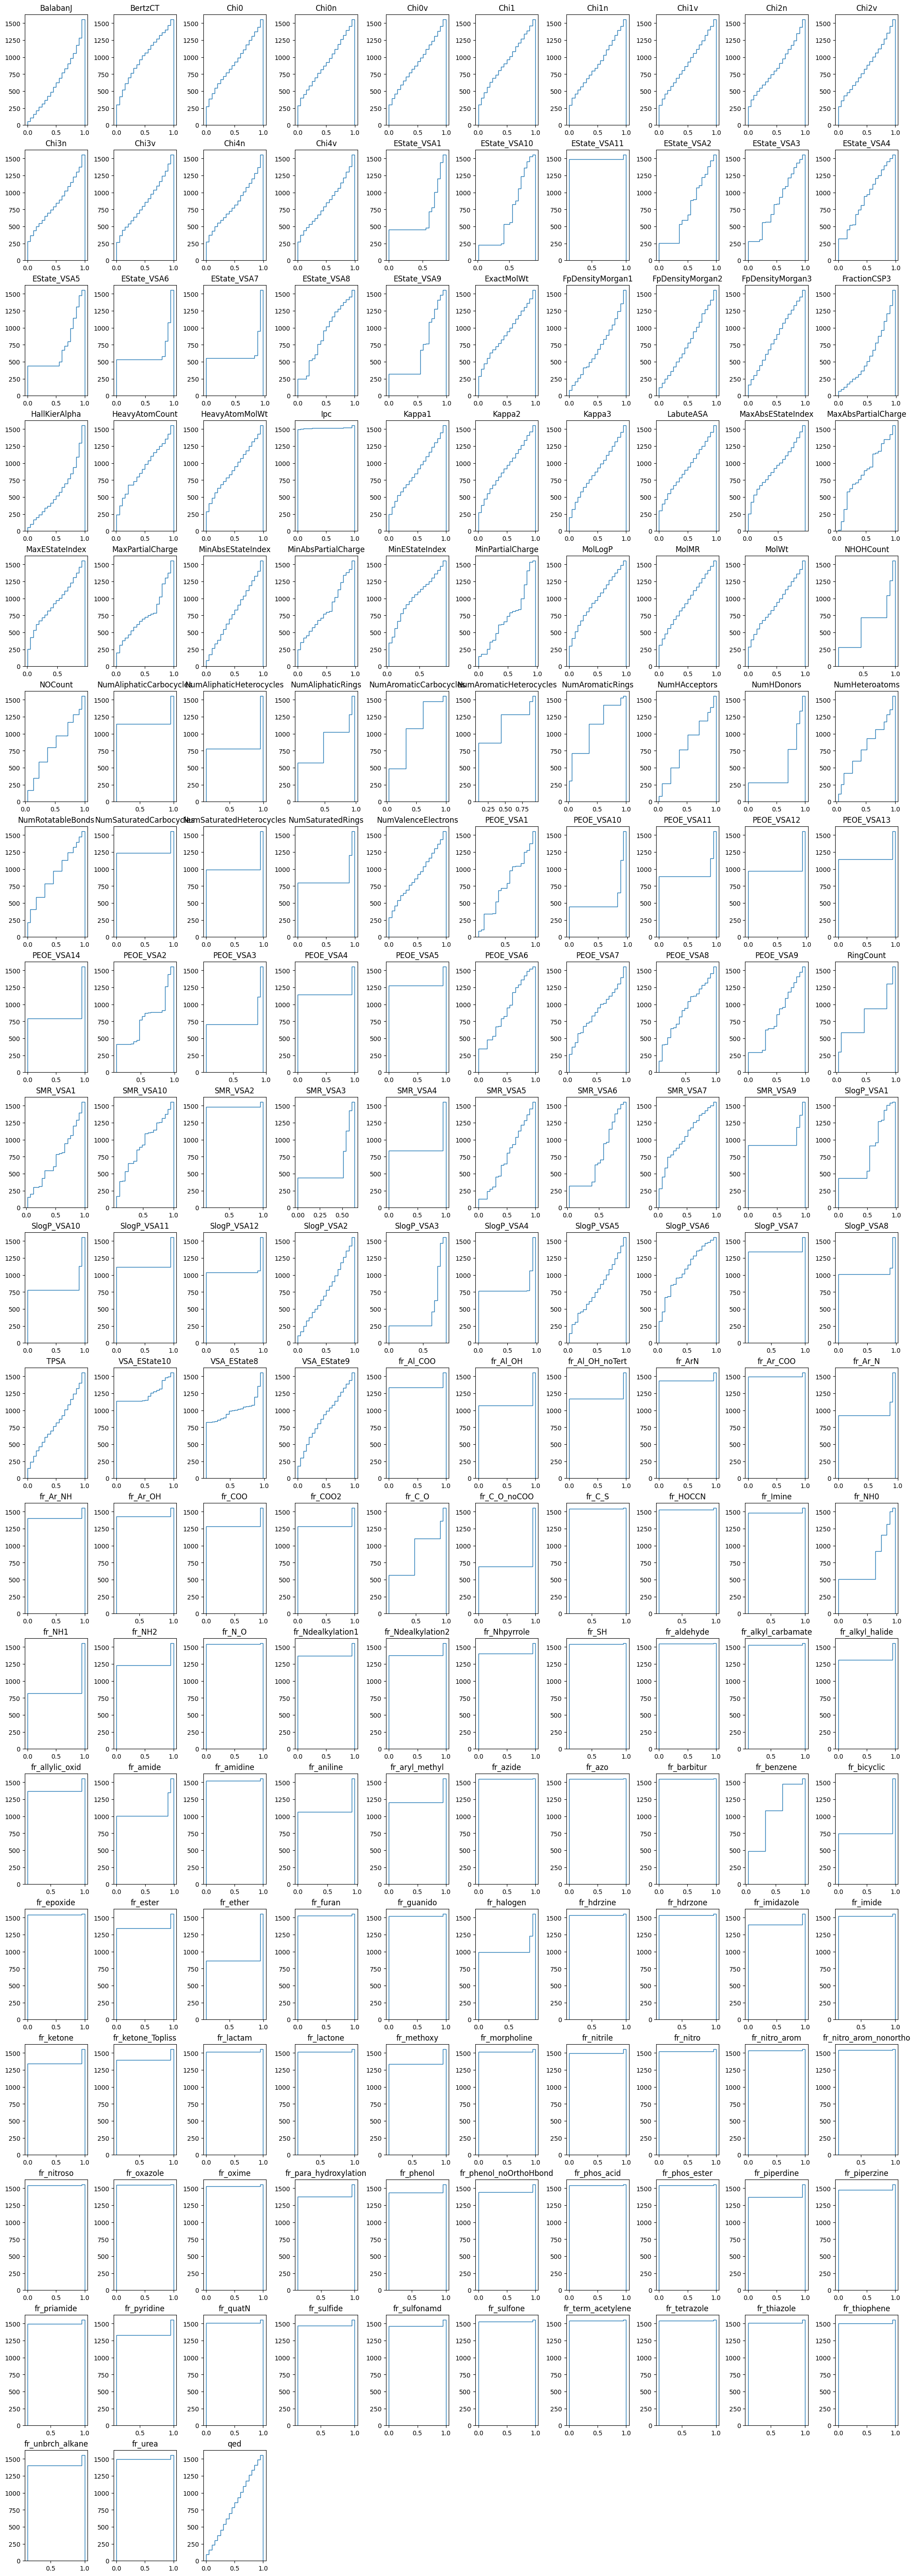

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Example DataFrame
# df = pd.DataFrame(np.random.randn(100, 200), columns=[f'col_{i}' for i in range(200)])

# Create subplots
n_cols = 10  # Number of columns per row
n_rows = (df.shape[1] + n_cols - 1) // n_cols  # Calculate number of rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 3), constrained_layout=True)

# Plotting stair plots
for i, col in enumerate(df.columns):
    ax = axes[i // n_cols, i % n_cols]
    values, base = np.histogram(df[col].dropna(), bins=20)
    cumulative = np.cumsum(values)
    ax.stairs(cumulative, base, label=col)
    ax.set_title(col)

# Hide any unused subplots
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j // n_cols, j % n_cols])

plt.show()


# Physchem invitro

In [1]:
import pandas as pd
from molbert.datasets.smiles import BertSmilesDataset
from molbert.utils.featurizer.molfeaturizer import SmilesIndexFeaturizer
from tqdm import tqdm

In [2]:
invitro_data = pd.read_pickle("/projects/home/mmasood1/arslan_data_repository/invitro/invitro_1m/25_04_2024/SMILES_len_th_128/invitro_1m_300k_ADME_SMILES_filtered.pkl")
config_dict = {
    "max_seq_length": 128,
    "train_file": "/projects/home/mmasood1/arslan_data_repository/Mix_clinical_pre_clinical/02_05_2024/clinical_pre_clinical_with_blood_marker_filtered.csv",
    "num_physchem_properties": 200,
    "permute": False,
    
}

In [3]:
featurizer = SmilesIndexFeaturizer.bert_smiles_index_featurizer(config_dict["max_seq_length"], permute = False)
#elements = featurizer.load_periodic_table()[0]
#featurizer = SmilesIndexFeaturizer.bert_smiles_index_featurizer(max_length=config_dict["max_seq_length"], 
#                                                                allowed_elements=tuple(elements),
#                                                                permute = False)
config_dict["vocab_size"] = featurizer.vocab_size
train_dataset = BertSmilesDataset(
            input_path= config_dict['train_file'],
            featurizer= featurizer,
            single_seq_len= config_dict["max_seq_length"],
            total_seq_len= config_dict["max_seq_length"],
            num_physchem= config_dict["num_physchem_properties"],
            permute= config_dict["permute"],
            inference_mode = False
        )
descriptors_names = train_dataset.physchem_featurizer.descriptors

In [6]:
from multiprocessing import Pool
def compute_physchem(smile):
    physchem = train_dataset.calculate_physchem_props(smile)
    physchem = pd.DataFrame(physchem).T
    physchem.columns = descriptors_names
    physchem.insert(0, "SMILES", smile)
    return physchem

def compute_physchem_parallel(smiles_list):
    with Pool() as pool:
        physchem_df = pd.DataFrame()
        total = len(smiles_list)
        with tqdm(total=total, ncols=80, desc="Processing") as pbar:
            for physchem in pool.imap(compute_physchem, smiles_list):
                physchem_df = pd.concat([physchem_df, physchem], axis = 0)
                pbar.update(1)
    return physchem_df

In [9]:
physchem_df = compute_physchem_parallel(invitro_data.Normalized_SMILES.tolist())

Processing:   0%|                        | 712/1261446 [00:01<49:24, 425.30it/s]

Processing:   2%|▎                    | 19776/1261446 [09:05<9:31:09, 36.23it/s]


KeyboardInterrupt: 

In [8]:
physchem_df.to_pickle("/projects/home/mmasood1/arslan_data_repository/invitro/invitro_1m/25_04_2024/SMILES_len_th_128/PhysChem_invitro_1m_300k_ADME_SMILES_filtered.pkl", index = False)

,SMILES,BalabanJ,BertzCT,Chi0,Chi0n,Chi0v,Chi1,Chi1n,Chi1v,Chi2n,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,qed
0,CN(C)CCOC1=CC=NC(N)=N1,0.904650,0.011381,0.013623,0.019978,0.014697,0.012916,0.013836,0.008263,0.016581,...,5.849552e-24,7.451206e-13,7.105427e-15,0.168407,0.167338,0.000247,3.476727e-17,0.164657,2.839180e-16,0.716863
0,NC1=NC=CC(NCCSC2=CC=CC=C2)=N1,0.497630,0.064444,0.047372,0.050929,0.059147,0.064284,0.056303,0.089618,0.033003,...,5.849552e-24,7.451206e-13,7.105427e-15,0.168407,0.167338,0.000247,3.476727e-17,0.995714,2.839180e-16,0.581159
0,OCC#CCO,0.975724,0.001061,0.001193,0.001460,0.002119,0.001184,0.001419,0.001615,0.001274,...,5.849552e-24,7.451206e-13,7.105427e-15,0.168407,0.167338,0.000247,3.476727e-17,0.164657,2.839180e-16,0.223790
0,C#CCC(C)(O)C=C,0.996221,0.001791,0.001919,0.002165,0.002119,0.001349,0.001840,0.001615,0.003484,...,5.849552e-24,7.451206e-13,1.000000e+00,0.168407,0.167338,0.000247,3.476727e-17,0.164657,2.839180e-16,0.276751
0,CCCCCCCCCCCCCCCC[N+](CCC)(CCC)CCO,0.993970,0.009753,0.504692,0.778805,0.747799,0.463613,0.867769,0.819927,0.789420,...,5.849552e-24,7.451206e-13,7.105427e-15,0.168407,0.167338,0.000247,3.476727e-17,1.000000,2.839180e-16,0.045171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,CC12CCC(=O)C=C1CCC1C2CCC2(C)C(O)CCC12,0.446124,0.088238,0.165389,0.316941,0.258671,0.163235,0.500375,0.406459,0.794657,...,5.849552e-24,7.451206e-13,7.105427e-15,0.168407,0.167338,0.000247,3.476727e-17,0.164657,2.839180e-16,0.756625
0,C=CCC1=CC(C(CC)C(CC)C2=CC=C(O)C(CC=C)=C2)=CC=C1O,0.920191,0.235214,0.485267,0.562984,0.508442,0.440574,0.581921,0.489397,0.528513,...,5.849552e-24,7.451206e-13,7.105427e-15,0.168407,0.167338,0.000247,3.476727e-17,0.164657,2.839180e-16,0.427794
0,CC12CCC3C4=CC=C(O)C=C4CCC3C1CCC2O,0.472126,0.106598,0.116686,0.208131,0.160948,0.135625,0.375417,0.288367,0.641397,...,5.849552e-24,7.451206e-13,7.105427e-15,0.168407,0.167338,0.000247,3.476727e-17,0.164657,2.839180e-16,0.793306
0,C#CC1(O)CCC2C3CCC4=CC(=O)CCC4C3CCC21C,0.404231,0.137582,0.209606,0.324382,0.265676,0.210615,0.508037,0.414052,0.761470,...,5.849552e-24,7.451206e-13,1.000000e+00,0.168407,0.167338,0.000247,3.476727e-17,0.164657,2.839180e-16,0.693196


In [1]:
import pandas as pd
from molbert.datasets.smiles import BertSmilesDataset
from molbert.utils.featurizer.molfeaturizer import SmilesIndexFeaturizer
from tqdm import tqdm


invitro_data = pd.read_pickle("/projects/home/mmasood1/arslan_data_repository/invitro/invitro_1m/25_04_2024/SMILES_len_th_128/invitro_1m_300k_ADME_SMILES_filtered.pkl")
config_dict = {
    "max_seq_length": 128,
    "train_file": "/projects/home/mmasood1/arslan_data_repository/Mix_clinical_pre_clinical/02_05_2024/clinical_pre_clinical_with_blood_marker_filtered.csv",
    "num_physchem_properties": 200,
    "permute": False,
    
}


# In[3]:


featurizer = SmilesIndexFeaturizer.bert_smiles_index_featurizer(config_dict["max_seq_length"], permute = False)
#elements = featurizer.load_periodic_table()[0]
#featurizer = SmilesIndexFeaturizer.bert_smiles_index_featurizer(max_length=config_dict["max_seq_length"], 
#                                                                allowed_elements=tuple(elements),
#                                                                permute = False)
config_dict["vocab_size"] = featurizer.vocab_size
train_dataset = BertSmilesDataset(
            input_path= config_dict['train_file'],
            featurizer= featurizer,
            single_seq_len= config_dict["max_seq_length"],
            total_seq_len= config_dict["max_seq_length"],
            num_physchem= config_dict["num_physchem_properties"],
            permute= config_dict["permute"],
            inference_mode = False
        )
descriptors_names = train_dataset.physchem_featurizer.descriptors

In [7]:
from multiprocessing import Pool
def compute_physchem(smile):
    physchem = train_dataset.calculate_physchem_props(smile)
    return physchem

def compute_physchem_parallel(smiles_list):
    with Pool() as pool:
        
        total = len(smiles_list)
        with tqdm(total=total, ncols=80, desc="Processing") as pbar:
            results = []
            for physchem in pool.imap(compute_physchem, smiles_list):
                results.append(physchem)
                pbar.update(1)
            results
    return results


# In[9]:


physchem_df = compute_physchem_parallel(invitro_data.Normalized_SMILES.tolist()[:100])
physchem_df = pd.DataFrame(physchem_df)
physchem_df.columns = descriptors_names
physchem_df.insert(0, "SMILES", invitro_data.Normalized_SMILES.tolist()[:100])
# In[8]:

print("Saving pickle")
physchem_df.to_pickle("/projects/home/mmasood1/arslan_data_repository/invitro/invitro_1m/25_04_2024/SMILES_len_th_128/PhysChem_invitro_1m_300k_ADME_SMILES_filtered.pkl")

Processing: 100%|████████████████████████████| 100/100 [00:00<00:00, 493.37it/s]


Saving pickle


In [8]:
physchem_df

,SMILES,BalabanJ,BertzCT,Chi0,Chi0n,Chi0v,Chi1,Chi1n,Chi1v,Chi2n,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,qed
0,CN(C)CCOC1=CC=NC(N)=N1,0.904650,0.011381,0.013623,0.019978,0.014697,0.012916,0.013836,0.008263,0.016581,...,5.849552e-24,7.451206e-13,7.105427e-15,0.168407,0.167338,0.000247,3.476727e-17,0.164657,2.839180e-16,0.716863
1,NC1=NC=CC(NCCSC2=CC=CC=C2)=N1,0.497630,0.064444,0.047372,0.050929,0.059147,0.064284,0.056303,0.089618,0.033003,...,5.849552e-24,7.451206e-13,7.105427e-15,0.168407,0.167338,0.000247,3.476727e-17,0.995714,2.839180e-16,0.581159
2,OCC#CCO,0.975724,0.001061,0.001193,0.001460,0.002119,0.001184,0.001419,0.001615,0.001274,...,5.849552e-24,7.451206e-13,7.105427e-15,0.168407,0.167338,0.000247,3.476727e-17,0.164657,2.839180e-16,0.223790
3,C#CCC(C)(O)C=C,0.996221,0.001791,0.001919,0.002165,0.002119,0.001349,0.001840,0.001615,0.003484,...,5.849552e-24,7.451206e-13,1.000000e+00,0.168407,0.167338,0.000247,3.476727e-17,0.164657,2.839180e-16,0.276751
4,CCCCCCCCCCCCCCCC[N+](CCC)(CCC)CCO,0.993970,0.009753,0.504692,0.778805,0.747799,0.463613,0.867769,0.819927,0.789420,...,5.849552e-24,7.451206e-13,7.105427e-15,0.168407,0.167338,0.000247,3.476727e-17,1.000000,2.839180e-16,0.045171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,CC12CCC(=O)C=C1CCC1C2CCC2(C)C(O)CCC12,0.446124,0.088238,0.165389,0.316941,0.258671,0.163235,0.500375,0.406459,0.794657,...,5.849552e-24,7.451206e-13,7.105427e-15,0.168407,0.167338,0.000247,3.476727e-17,0.164657,2.839180e-16,0.756625
96,C=CCC1=CC(C(CC)C(CC)C2=CC=C(O)C(CC=C)=C2)=CC=C1O,0.920191,0.235214,0.485267,0.562984,0.508442,0.440574,0.581921,0.489397,0.528513,...,5.849552e-24,7.451206e-13,7.105427e-15,0.168407,0.167338,0.000247,3.476727e-17,0.164657,2.839180e-16,0.427794
97,CC12CCC3C4=CC=C(O)C=C4CCC3C1CCC2O,0.472126,0.106598,0.116686,0.208131,0.160948,0.135625,0.375417,0.288367,0.641397,...,5.849552e-24,7.451206e-13,7.105427e-15,0.168407,0.167338,0.000247,3.476727e-17,0.164657,2.839180e-16,0.793306
98,C#CC1(O)CCC2C3CCC4=CC(=O)CCC4C3CCC21C,0.404231,0.137582,0.209606,0.324382,0.265676,0.210615,0.508037,0.414052,0.761470,...,5.849552e-24,7.451206e-13,1.000000e+00,0.168407,0.167338,0.000247,3.476727e-17,0.164657,2.839180e-16,0.693196


In [8]:
# complete invitro set
import pandas as pd
pd.set_option('display.max_columns', None)


In [2]:
physchem = pd.read_pickle("/projects/home/mmasood1/arslan_data_repository/invitro/invitro_1m/25_04_2024/SMILES_len_th_128/PhysChem_invitro_1m_300k_ADME_SMILES_filtered.pkl")


In [5]:
physchem.drop("SMILES", axis = 1, inplace = True)

In [9]:
physchem.describe()

,BalabanJ,BertzCT,Chi0,Chi0n,Chi0v,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3n,Chi3v,Chi4n,Chi4v,EState_VSA1,EState_VSA10,EState_VSA11,EState_VSA2,EState_VSA3,EState_VSA4,EState_VSA5,EState_VSA6,EState_VSA7,EState_VSA8,EState_VSA9,ExactMolWt,FpDensityMorgan1,FpDensityMorgan2,FpDensityMorgan3,FractionCSP3,HallKierAlpha,HeavyAtomCount,HeavyAtomMolWt,Ipc,Kappa1,Kappa2,Kappa3,LabuteASA,MaxAbsEStateIndex,MaxAbsPartialCharge,MaxEStateIndex,MaxPartialCharge,MinAbsEStateIndex,MinAbsPartialCharge,MinEStateIndex,MinPartialCharge,MolLogP,MolMR,MolWt,NHOHCount,NOCount,NumAliphaticCarbocycles,NumAliphaticHeterocycles,NumAliphaticRings,NumAromaticCarbocycles,NumAromaticHeterocycles,NumAromaticRings,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRadicalElectrons,NumRotatableBonds,NumSaturatedCarbocycles,NumSaturatedHeterocycles,NumSaturatedRings,NumValenceElectrons,PEOE_VSA1,PEOE_VSA10,PEOE_VSA11,PEOE_VSA12,PEOE_VSA13,PEOE_VSA14,PEOE_VSA2,PEOE_VSA3,PEOE_VSA4,PEOE_VSA5,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,PEOE_VSA9,RingCount,SMR_VSA1,SMR_VSA10,SMR_VSA2,SMR_VSA3,SMR_VSA4,SMR_VSA5,SMR_VSA6,SMR_VSA7,SMR_VSA8,SMR_VSA9,SlogP_VSA1,SlogP_VSA10,SlogP_VSA11,SlogP_VSA12,SlogP_VSA2,SlogP_VSA3,SlogP_VSA4,SlogP_VSA5,SlogP_VSA6,SlogP_VSA7,SlogP_VSA8,SlogP_VSA9,TPSA,VSA_EState1,VSA_EState10,VSA_EState2,VSA_EState3,VSA_EState4,VSA_EState5,VSA_EState6,VSA_EState7,VSA_EState8,VSA_EState9,fr_Al_COO,fr_Al_OH,fr_Al_OH_noTert,fr_ArN,fr_Ar_COO,fr_Ar_N,fr_Ar_NH,fr_Ar_OH,fr_COO,fr_COO2,fr_C_O,fr_C_O_noCOO,fr_C_S,fr_HOCCN,fr_Imine,fr_NH0,fr_NH1,fr_NH2,fr_N_O,fr_Ndealkylation1,fr_Ndealkylation2,fr_Nhpyrrole,fr_SH,fr_aldehyde,fr_alkyl_carbamate,fr_alkyl_halide,fr_allylic_oxid,fr_amide,fr_amidine,fr_aniline,fr_aryl_methyl,fr_azide,fr_azo,fr_barbitur,fr_benzene,fr_benzodiazepine,fr_bicyclic,fr_diazo,fr_dihydropyridine,fr_epoxide,fr_ester,fr_ether,fr_furan,fr_guanido,fr_halogen,fr_hdrzine,fr_hdrzone,fr_imidazole,fr_imide,fr_isocyan,fr_isothiocyan,fr_ketone,fr_ketone_Topliss,fr_lactam,fr_lactone,fr_methoxy,fr_morpholine,fr_nitrile,fr_nitro,fr_nitro_arom,fr_nitro_arom_nonortho,fr_nitroso,fr_oxazole,fr_oxime,fr_para_hydroxylation,fr_phenol,fr_phenol_noOrthoHbond,fr_phos_acid,fr_phos_ester,fr_piperdine,fr_piperzine,fr_priamide,fr_prisulfonamd,fr_pyridine,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,qed
count,1.261446e+06,1.261446e+06,1.261446e+06,1.261446e+06,1.261446e+06,1.261446e+06,1.261446e+06,1.261446e+06,1.261446e+06,1.261446e+06,1.261446e+06,1.261446e+06,1.261446e+06,1.261446e+06,1.261446e+06,1.261446e+06,1.261446e+06,1.261446e+06,1.261446e+06,1.261446e+06,1.261446e+06,1.261446e+06,1.261446e+06,1.261446e+06,1.261446e+06,1.261446e+06,1.261446e+06,1.261446e+06,1.261446e+06,1.261446e+06,1.261446e+06,1.261446e+06,1.261446e+06,1.261446e+06,1.261446e+06,1.261446e+06,1.261446e+06,1.261446e+06,1.261446e+06,1.261446e+06,1.261446e+06,1.261446e+06,1.261446e+06,1.261446e+06,1.261446e+06,1.261446e+06,1.261446e+06,1.261446e+06,1.261446e+06,1.261446e+06,1.261446e+06,1.261446e+06,1.261446e+06,1.261446e+06,1.261446e+06,1.261446e+06,1.261446e+06,1.261446e+06,1.261446e+06,1.261446e+06,1.261446e+06,1.261446e+06,1.261446e+06,1.261446e+06,1.261446e+06,1.261446e+06,1.261446e+06,1.261446e+06,1.261446e+06,1.261446e+06,1.261446e+06,1.261446e+06,1.261446e+06,1.261446e+06,1.261446e+06,1.261446e+06,1.261446e+06,1.261446e+06,1.261446e+06,1.261446e+06,1.261446e+06,1.261446e+06,1.261446e+06,1.261446e+06,1.261446e+06,1.261446e+06,1.261446e+06,1.261446e+06,1.261446e+06,1.261446e+06,1.261446e+06,1.261446e+06,1.261446e+06,1.261446e+06,1.261446e+06,1.261446e+06,1.261446e+06,1.261446e+06,1.261446e+06,1.261446e+06,1.261446e+06,1.261446e+06,1.261446e+06,1.261446e+06,1.261446e+06,1.261446e+06,1.261446e+06,1.261446e+06,1.261446e+06,1.261446e+06,1.261446e+06,1.261446e+06,1.261446e+06,1.261446e+06,1.261446e+06,1.261446e+06,1.261446e+06,1.261446e+06,1.261446e+06,1.261446e+06,1.261446e+06,1.261446e+06,1.261446e+06,1.261446e+06,1.261446e+06,1.26

In [10]:
physchem.loc[:,"NumRadicalElectrons"].unique()

array([5.30138094e-05])

In [14]:
physchem.loc[:,"VSA_EState1"].unique()

array([5.30138094e-05])

In [15]:
physchem.loc[:,"fr_benzodiazepine"].unique()

array([0.1756151])

In [18]:
physchem.min().min(), physchem.max().max()

(0.0, 1.0)

In [22]:
physchem.loc[:,physchem.std() < 1e-5]

,NumRadicalElectrons,SMR_VSA8,SlogP_VSA9,VSA_EState1,VSA_EState2,VSA_EState3,VSA_EState4,VSA_EState5,VSA_EState6,VSA_EState7,fr_benzodiazepine,fr_diazo,fr_dihydropyridine,fr_isocyan,fr_isothiocyan,fr_prisulfonamd,fr_thiocyan
0,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.175615,0.000053,0.330171,0.000053,0.000046,0.000053,0.000247
1,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.175615,0.000053,0.330171,0.000053,0.000046,0.000053,0.000247
2,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.175615,0.000053,0.330171,0.000053,0.000046,0.000053,0.000247
3,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.175615,0.000053,0.330171,0.000053,0.000046,0.000053,0.000247
4,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.175615,0.000053,0.330171,0.000053,0.000046,0.000053,0.000247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1261441,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.175615,0.000053,0.330171,0.000053,0.000046,0.000053,0.000247
1261442,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.175615,0.000053,0.330171,0.000053,0.000046,0.000053,0.000247
1261443,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.175615,0.000053,0.330171,0.000053,0.000046,0.000053,0.000247
1261444,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.175615,0.000053,0.330171,0.000053,0.000046,0.000053,0.000247


In [26]:
physchem.loc[:, physchem.nunique() == 1]

,NumRadicalElectrons,SMR_VSA8,SlogP_VSA9,VSA_EState1,VSA_EState2,VSA_EState3,VSA_EState4,VSA_EState5,VSA_EState6,VSA_EState7,fr_benzodiazepine,fr_diazo,fr_dihydropyridine,fr_isocyan,fr_isothiocyan,fr_prisulfonamd,fr_thiocyan
0,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.175615,0.000053,0.330171,0.000053,0.000046,0.000053,0.000247
1,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.175615,0.000053,0.330171,0.000053,0.000046,0.000053,0.000247
2,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.175615,0.000053,0.330171,0.000053,0.000046,0.000053,0.000247
3,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.175615,0.000053,0.330171,0.000053,0.000046,0.000053,0.000247
4,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.175615,0.000053,0.330171,0.000053,0.000046,0.000053,0.000247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1261441,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.175615,0.000053,0.330171,0.000053,0.000046,0.000053,0.000247
1261442,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.175615,0.000053,0.330171,0.000053,0.000046,0.000053,0.000247
1261443,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.175615,0.000053,0.330171,0.000053,0.000046,0.000053,0.000247
1261444,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.175615,0.000053,0.330171,0.000053,0.000046,0.000053,0.000247
